In [2]:
import os
os.environ['PROJ_LIB'] = '/usr/include/proj'

%matplotlib widget
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.basemap import Basemap

import numpy
import pickle

In [3]:
data_dir = '/tablespace/xcal/'

In [4]:
with open(f'{data_dir}/pickles/data.pickle'.format(data_dir), 'rb') as f:
    imerg = pickle.load(f)
    
with open(f'{data_dir}/pickles/timestamps.pickle', 'rb') as f:
    timestamps = pickle.load(f)

In [5]:
with open(f'{data_dir}/pickles/featuredb.pickle', 'rb') as f:
    sdf = pickle.load( f)

In [6]:
imerg = numpy.ma.masked_array(imerg, imerg<=0)

# Dump pngs

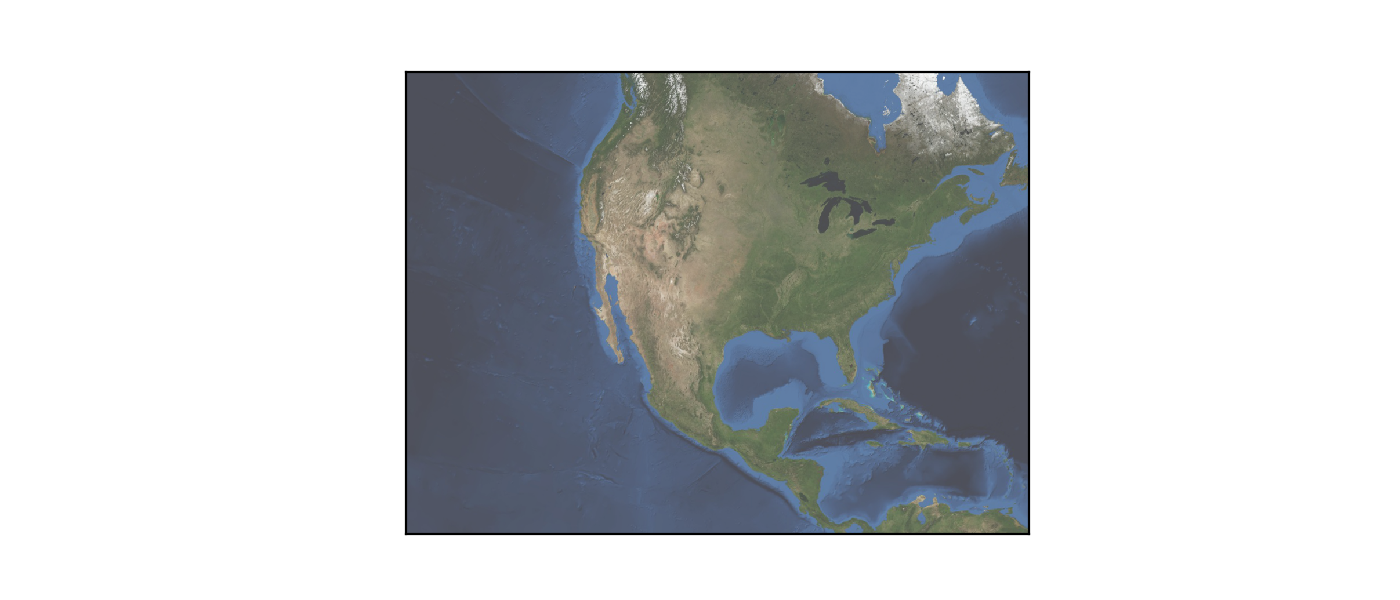

In [7]:
fig = plt.figure(figsize=(7, 3), dpi=200)
ax = fig.add_subplot()


#m = Basemap(projection='cyl')
#m = Basemap(projection='nsper', resolution='l', satellite_height=5000000., lat_0 = 20., lon_0 = -90., llcrnrlat=0, urcrnrlat=70, llcrnrlon=-130, urcrnrlon=-60)
#m = Basemap(projection='ortho', resolution='h', satellite_height=5000000., lat_0 = 20., lon_0 = -100)#., llcrnrlat=15, llcrnrlon=-130, urcrnrlon=-60, urcrnrlat=60)
m = Basemap(projection='aeqd', lon_0=-70, lat_0=20, llcrnrlat=0, urcrnrlat=60, llcrnrlon=-130, urcrnrlon=-50)
#m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=70, llcrnrlon=-140, urcrnrlon=-60)

m.bluemarble(alpha=0.7, interpolation='none')

NameError: name 'im' is not defined

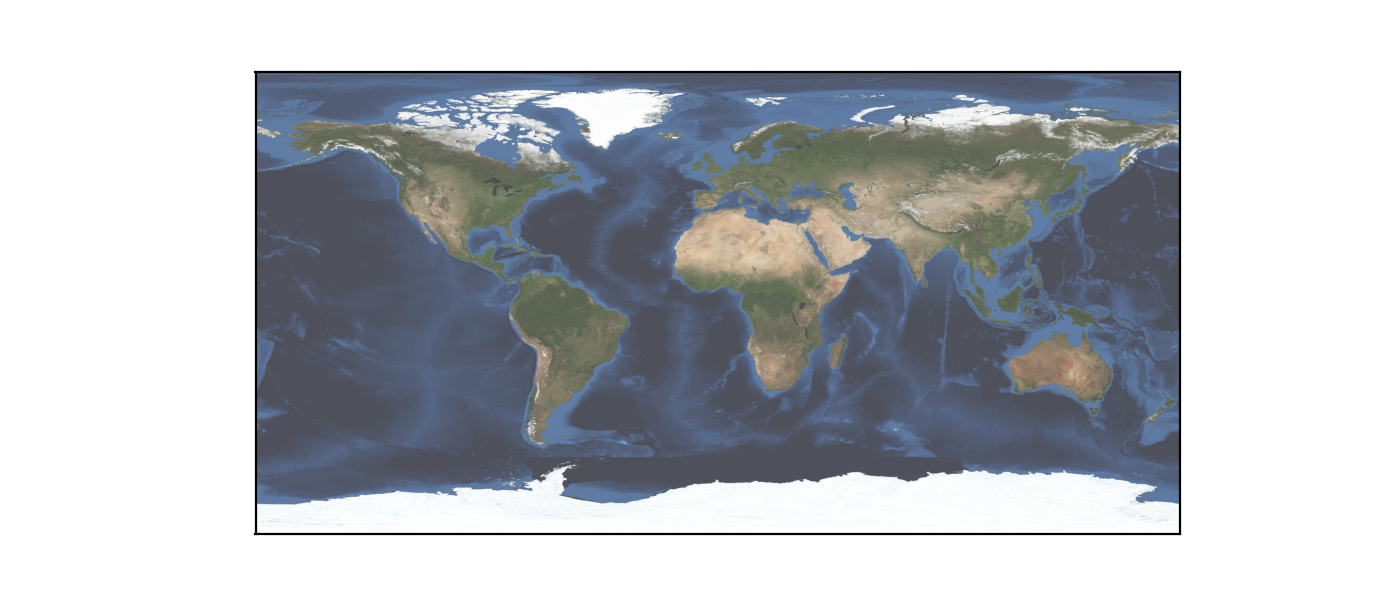

In [8]:
fig = plt.figure(figsize=(7, 3), dpi=200)
ax = fig.add_subplot()

m = Basemap(projection='cyl')
#m = Basemap(projection='cyl', llcrnrlat=0, urcrnrlat=70, llcrnrlon=-140, urcrnrlon=-60)
#m = Basemap(projection='aeqd', lon_0=-70, lat_0=20, llcrnrlat=0, urcrnrlat=60, llcrnrlon=-130, urcrnrlon=-50)

m.bluemarble(alpha=0.7)

cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.1)

for i in range(imerg.shape[0])[0:2]:
    layer = imerg[i]
    im = m.imshow(layer, 
                  cmap='RdYlGn_r',
                  interpolation='none',
                  extent=[-180, 180, -90, 90],
                  alpha=0.9,
                  norm=LogNorm(vmin=0.1, vmax=53))
    ax.set_title(timestamps[i])    
    
    fig.savefig(f'{timestamps[i]}.png', 
                bbox_inches='tight')

#### Animation

In [ ]:
fig = plt.figure(figsize=(8, 4), dpi=300)
ax = fig.add_subplot(111)

m = Basemap(projection='cyl')
#m = Basemap(projection='ortho', lon_0=-65, lat_0=30, resolution='l')
#m = Basemap(projection='moll', lon_0=-105)

m.bluemarble(alpha=0.7)
#m.drawcoastlines(0.1)
#m.drawparallels(numpy.arange(-90.,120.,30.), linewidth=0.1)
#m.drawmeridians(numpy.arange(0, 360, 30), linewidth=0.1)
#m.fillcontinents(color='coral', lake_color='coral')
#m.drawlsmask(land_color = "#ddaa66", ocean_color="#7777ff", resolution = 'l')
#m.drawmapboundary(fill_color='aqua')

im = m.imshow(imerg[0], 
              cmap='RdYlGn_r',
              interpolation='none',
              extent=[-180, 180, -90, 90],
              alpha=0.9,
              norm=LogNorm(vmin=0.1, vmax=53))

def animate(i):    
    im.set_array(imerg[i])    
    ax.set_title(timestamps[i])
    return [im]

anim = animation.FuncAnimation(fig,
                               animate,                                
                               frames=len(imerg),
                               interval=10, # in ms
                               blit=True,
                               repeat=True)

cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.1)